<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 175.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 196.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 162.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 155.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 131.6 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [26]:
## Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [27]:
df.shape

(65437, 114)

In [28]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [29]:
df['JobSat'] = df['JobSat'].astype('object')

In [30]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.0
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,11.0
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,8.0
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,7509.0
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,NaN
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,NaN
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,NaN
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,NaN
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,NaN


In [31]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [32]:
## Write your code here
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [33]:
categorical_columns_df = df.select_dtypes(include=['object'])

In [34]:
for column in categorical_columns_df:
    df[column] = df[column].fillna(df[column].mode()[0])

/tmp/ipykernel_132/484896764.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0])


In [35]:
for column in df.select_dtypes(include=['float', 'int']):
    df[column] = df[column].fillna(df[column].mean())

In [36]:
df.isnull().sum()

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [41]:
## Write your code here
yearscode_count_df=df['YearsCodePro'].value_counts()

In [42]:
employment_count_df=df[['Employment']].value_counts()

In [52]:
jobsat_count_df=df[['JobSat']].value_counts()

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


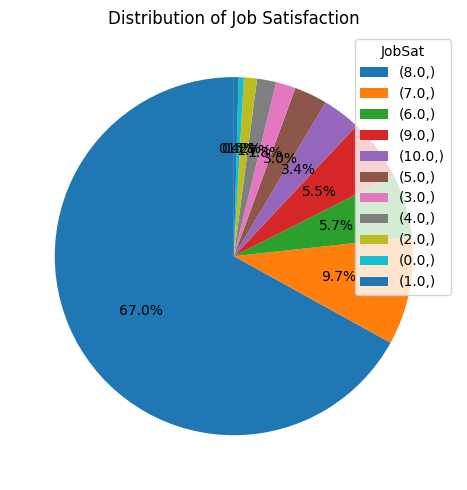

In [62]:
## Write your code here
plt.figure(figsize=(8,5))
plt.pie(x=jobsat_count_df, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Job Satisfaction')
plt.tight_layout()
plt.legend(title='JobSat',labels=jobsat_count_df.index, loc='upper right')
plt.show()

Views: Over 70% of the surveyors are hihgly satisfied with their jobs with a satisfaction score of 8.0 on a scale of 1 to 10 with 10 beings the most satisfied.
Similarly, less than 10% of the surveyors are dissatisfied with their job with a rating of below avearge job satisfaction.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [63]:
## Write your code here
# Split the values in the columns (assuming they're comma-separated strings)
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')

# Flatten and count occurrences for each column
lang_have = pd.Series([lang for sublist in df['LanguageHaveWorkedWith'].dropna() for lang in sublist])
lang_want = pd.Series([lang for sublist in df['LanguageWantToWorkWith'].dropna() for lang in sublist])

# Count the frequencies of each language
lang_have_counts = lang_have.value_counts()
lang_want_counts = lang_want.value_counts()

# Combine the counts into a single DataFrame for comparison
lang_comparison = pd.DataFrame({
    'HaveWorkedWith': lang_have_counts,
    'WantToWorkWith': lang_want_counts
}).fillna(0).astype(int)  # Fill NaN with 0 and convert to int


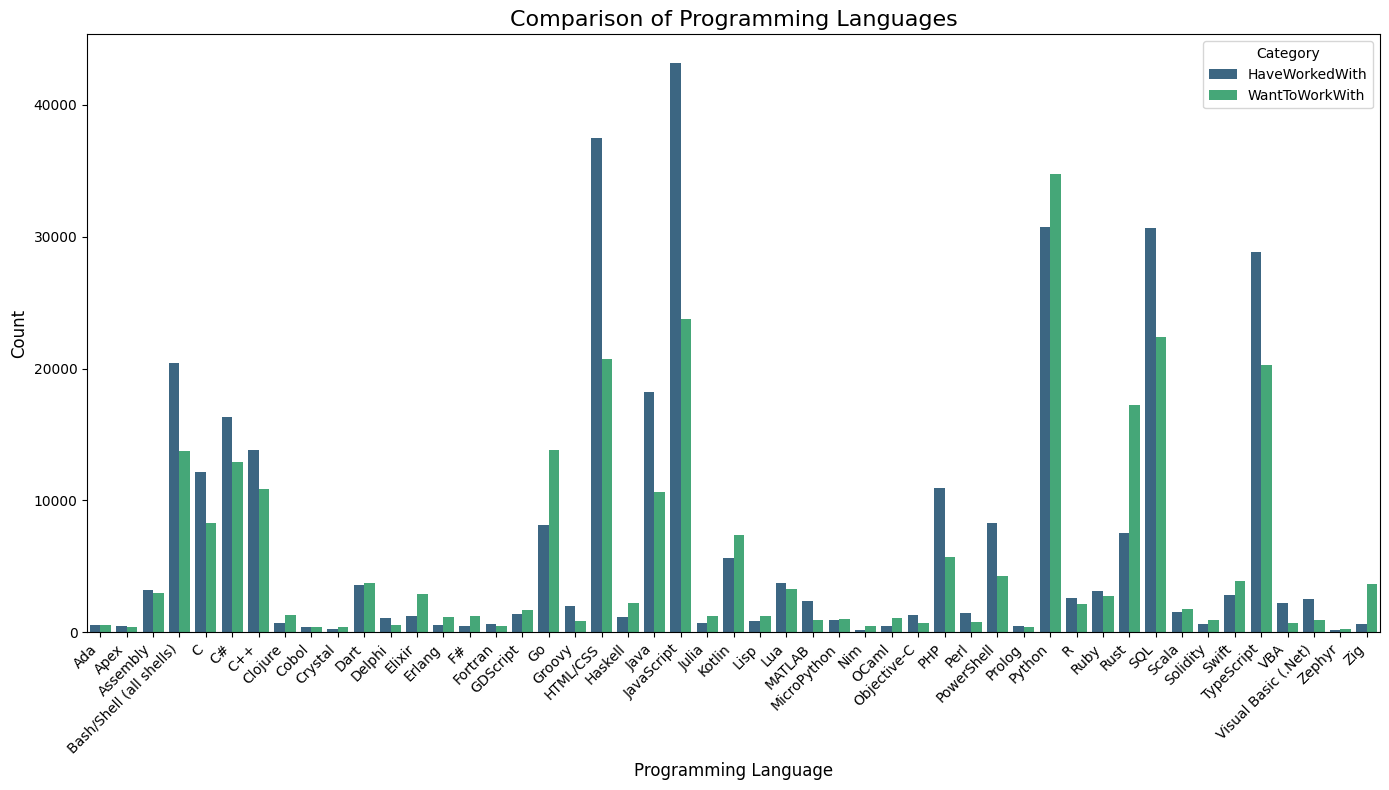

In [66]:
# Reset the index for better plotting
lang_comparison = lang_comparison.reset_index().rename(columns={'index': 'Language'})

# Plot a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=lang_comparison.melt(id_vars='Language', var_name='Category', value_name='Count'), 
            x='Language', y='Count', hue='Category', palette='viridis')

# Add labels and title
plt.title('Comparison of Programming Languages', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [67]:
## Write your code here
remote_work_counts = df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')

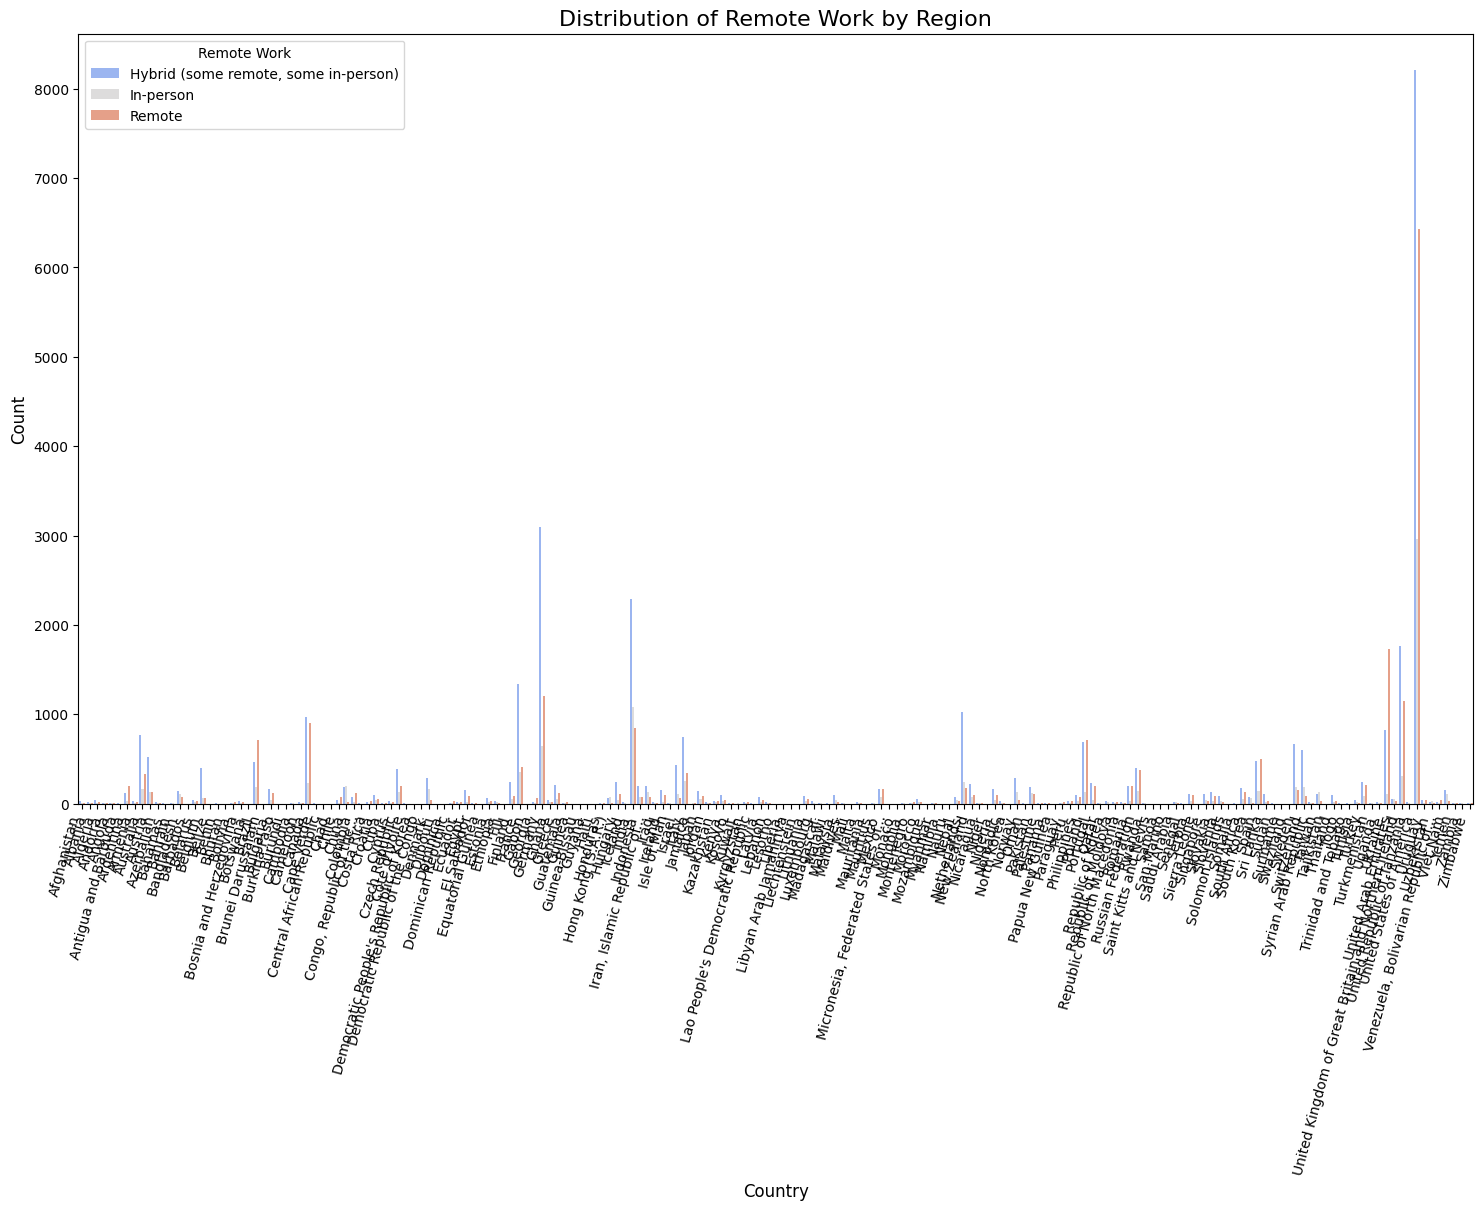

In [74]:
# Grouped bar chart
plt.figure(figsize=(18, 10))
sns.barplot(data=remote_work_counts,x='Country',y='Count',hue='RemoteWork',palette='coolwarm')
plt.title('Distribution of Remote Work by Region', fontsize=16)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation=75, ha='right') 
plt.legend(title='Remote Work')
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [88]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 208.0 MB/s eta 0:00:00


In [89]:
from scipy.stats import pearsonr, spearmanr

In [84]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [85]:
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

In [90]:
pearson_corr, pearson_p = pearsonr(df['JobSat'], df['YearsCodePro'])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")

Pearson Correlation: 0.009, p-value: 0.027


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [95]:
## Write your code here

crosstab = pd.crosstab(df['Employment'], df['EdLevel'])
print(crosstab.head())

EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1028   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  103   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   

EdLevel                                             Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
Employment                                                                                         
Employed, full-time                                                                        18884   
Employed, full-time;Employed, part-time                       

In [ ]:
# Plot a stacked bar plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Employment Status vs. Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.legend(title='Education Level',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_132/2346144281.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv("CleanedData.csv")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
